In [1]:
import numpy as np
import pandas as pd
from PIL import Image
import os
import random
import matplotlib.pyplot as plt

C:\Users\Juan\AppData\Local\Temp\ipykernel_23476\3953103190.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
img_folder_path = './../data/raw/ferplus_affectnet/'

pixel_values_list = []
labels_list = []

for category in os.listdir(img_folder_path):
    category_path = os.path.join(img_folder_path, category)
    
    if os.path.isdir(category_path):
        # Iterating through images in the subfolder
        for file_name in os.listdir(category_path):
            file_path = os.path.join(category_path, file_name)
            
            if file_path.lower().endswith(('.png', '.jpg', '.jpeg')):
                img = Image.open(file_path)
                
                # Resize image to 48x48
                img = img.resize((48, 48))

                # Converting image to grayscale
                img = img.convert('L')
                
                # Converting the image data to a flat list of pixel values
                pixel_values = list(img.getdata())
                
                # Append the pixel values and corresponding label to the lists
                pixel_values_list.append(pixel_values)
                labels_list.append(category)

    print(f'{category} images processed')

# Creating dataframe with all image data
columns = [f'Pixel_{i+1}' for i in range(len(pixel_values_list[0]))]
df_img = pd.DataFrame(pixel_values_list, columns=columns)
df_img['Label'] = labels_list

anger images processed
contempt images processed
disgust images processed
fear images processed
happiness images processed
neutral images processed
sadness images processed
surprise images processed


In [3]:
# Checking first few rows

df_img.head()

,Pixel_1,Pixel_2,Pixel_3,Pixel_4,Pixel_5,Pixel_6,Pixel_7,Pixel_8,Pixel_9,Pixel_10,...,Pixel_2296,Pixel_2297,Pixel_2298,Pixel_2299,Pixel_2300,Pixel_2301,Pixel_2302,Pixel_2303,Pixel_2304,Label
0,30,24,21,23,25,25,49,67,84,103,...,106,111,148,137,176,174,172,173,173,anger
1,123,125,124,142,209,226,234,236,231,232,...,103,116,111,105,105,103,97,91,89,anger
2,236,230,225,226,228,209,199,193,196,211,...,192,190,186,171,144,144,152,155,173,anger
3,255,82,0,3,0,0,0,0,0,0,...,101,217,255,198,143,236,254,254,254,anger
4,206,208,209,212,214,216,216,219,221,222,...,38,42,50,47,26,31,29,40,5,anger


In [4]:
# Checking shape of the dataframe, columns should be 48*48 + 1

df_img.shape

(64527, 2305)

In [5]:
# Checking if all the columns except the last one are integers

(df_img.drop(columns='Label').dtypes == 'int64').all()

True

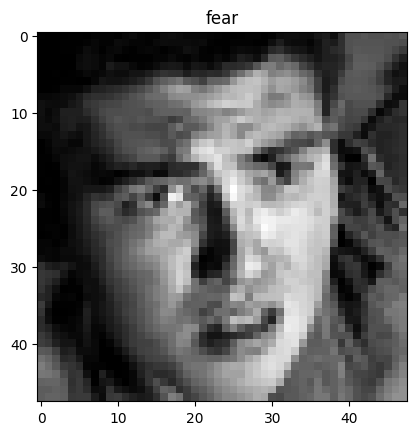

In [6]:
# Plotting a random image from the dataframe

pick = random.randint(0, len(df_img))

image_array = df_img.drop(columns='Label').iloc[pick, :].values.reshape(48, 48)

plt.imshow(image_array, cmap='gray')
plt.title(df_img.iloc[pick, -1])
plt.show()

In [7]:
df_img.to_csv('./../data/cleaned/ferplus_affectnet.csv', index=False)